# Importing Libraries

In [1]:
import cv2 
import matplotlib.pyplot as plt
import re
import os

# Importing Dataset

In [2]:
Data_dir = r"C:\Users\Sunshine\Downloads\Compressed\samples_of_fingers"
categories = ["one-samples", "two-samples", "Three-samples", "Four-samples"]

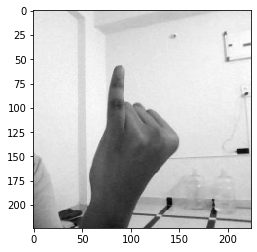

In [3]:
for category in categories:
    path = os.path.join(Data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        break
    break

In [4]:
img_array

array([[170, 170, 170, ..., 176, 177, 176],
       [171, 171, 171, ..., 174, 175, 176],
       [172, 171, 172, ..., 174, 175, 175],
       ...,
       [ 82,  81,  82, ..., 155, 155, 154],
       [ 80,  79,  80, ..., 156, 154, 151],
       [ 78,  77,  78, ..., 156, 156, 155]], dtype=uint8)

In [5]:
img_array.shape

(224, 224)

In [6]:
img_size = 50

new_array = cv2.resize(img_array, (img_size, img_size))

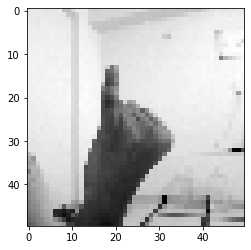

In [7]:
plt.imshow(new_array, cmap = "gray")
plt.show()

In [8]:
training_data = []

def load_data():
    for category in categories:
        path = os.path.join(Data_dir, category)
        num_class = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, num_class])
            except Exception as e:
                pass

In [9]:
load_data()

In [10]:
print(training_data)

[[array([[171, 174, 174, ..., 174, 175, 174],
       [174, 174, 175, ..., 179, 177, 177],
       [175, 175, 172, ..., 179, 180, 180],
       ...,
       [ 95, 103, 110, ..., 147, 149, 149],
       [ 90,  97, 106, ...,  93,  85,  77],
       [ 81,  89, 102, ..., 153, 154, 155]], dtype=uint8), 0], [array([[172, 173, 174, ..., 175, 175, 177],
       [172, 174, 175, ..., 178, 177, 178],
       [175, 175, 174, ..., 179, 179, 179],
       ...,
       [ 94, 102, 111, ..., 146, 148, 148],
       [ 90,  98, 106, ..., 103,  92,  76],
       [ 84,  92, 101, ..., 154, 154, 154]], dtype=uint8), 0], [array([[173, 172, 172, ..., 175, 174, 173],
       [172, 175, 174, ..., 178, 179, 176],
       [174, 176, 174, ..., 179, 179, 179],
       ...,
       [ 93, 101, 109, ..., 148, 146, 148],
       [ 89,  98, 106, ...,  92,  82,  78],
       [ 82,  92,  98, ..., 152, 155, 155]], dtype=uint8), 0], [array([[171, 173, 173, ..., 176, 177, 177],
       [172, 174, 172, ..., 177, 178, 178],
       [175, 176, 173,

In [11]:
print(len(training_data))

1984


In [12]:
import random

random.shuffle(training_data)

In [13]:
print(training_data[:10])

[[array([[207, 207, 204, ..., 229, 228, 226],
       [201, 205, 205, ..., 242, 240, 237],
       [176, 205, 206, ..., 249, 245, 244],
       ...,
       [ 74,  75,  77, ...,  50,  47,  46],
       [ 71,  70,  77, ...,  47,  48,  43],
       [ 69,  72,  75, ...,  44,  43,  41]], dtype=uint8), 3], [array([[171, 169, 172, ..., 169, 169, 165],
       [171, 172, 171, ..., 169, 149, 129],
       [171, 173, 173, ..., 171, 153, 167],
       ...,
       [104, 109, 117, ...,  55, 147, 148],
       [ 97, 105,  85, ...,  61, 150, 151],
       [ 90,  66,  68, ...,  95, 149, 151]], dtype=uint8), 1], [array([[168, 169, 170, ..., 169, 167, 168],
       [170, 171, 171, ..., 169, 113, 169],
       [172, 172, 171, ..., 171, 134, 168],
       ...,
       [ 98, 100, 114, ..., 154, 152, 151],
       [ 92, 100,  85, ..., 154, 155, 152],
       [ 63,  69,  76, ..., 151, 150, 150]], dtype=uint8), 2], [array([[174, 173, 176, ..., 172, 173, 171],
       [175, 177, 177, ..., 172, 172, 144],
       [175, 176, 177,

In [14]:
for labels in training_data[:10]:
    print(labels[1])

3
1
2
2
1
1
3
0
3
0


In [15]:
X = []
y = []
for features, labels in training_data:
    X.append(features)
    y.append(labels)

In [16]:
import numpy as np
X  = np.array(X).reshape(-1, img_size, img_size, 1)

In [17]:
X.shape

(1984, 50, 50, 1)

In [18]:
X[1]

array([[[171],
        [169],
        [172],
        ...,
        [169],
        [169],
        [165]],

       [[171],
        [172],
        [171],
        ...,
        [169],
        [149],
        [129]],

       [[171],
        [173],
        [173],
        ...,
        [171],
        [153],
        [167]],

       ...,

       [[104],
        [109],
        [117],
        ...,
        [ 55],
        [147],
        [148]],

       [[ 97],
        [105],
        [ 85],
        ...,
        [ 61],
        [150],
        [151]],

       [[ 90],
        [ 66],
        [ 68],
        ...,
        [ 95],
        [149],
        [151]]], dtype=uint8)

In [19]:
np.array(y).shape

(1984,)

# Making Model

In [20]:
import keras

Using TensorFlow backend.


In [21]:
y = keras.utils.to_categorical(y, num_classes=4)

In [22]:
model = keras.Sequential([
    keras.layers.Conv2D(256, (3,3), strides = (1,1), padding = "valid", input_shape = (50, 50, 1)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "valid"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), strides = (1,1), padding = "valid"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(4, activation = "softmax")
])

model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [23]:
model.fit(X, y, epochs = 5)

Epoch 1/5
1984/1984 [==============================] - 39s 19ms/step - loss: 21.0678 - accuracy: 0.3967
Epoch 2/5
1984/1984 [==============================] - 38s 19ms/step - loss: 0.5729 - accuracy: 0.7747
Epoch 3/5
1984/1984 [==============================] - 38s 19ms/step - loss: 0.2845 - accuracy: 0.8916
Epoch 4/5
1984/1984 [==============================] - 38s 19ms/step - loss: 0.1139 - accuracy: 0.9763
Epoch 5/5
1984/1984 [==============================] - 38s 19ms/step - loss: 0.0799 - accuracy: 0.9824


In [24]:
y_pred = model.predict(X)

In [25]:
y_pred

array([[6.5762492e-07, 7.5299778e-07, 2.7557174e-08, 9.9999857e-01],
       [1.6293809e-06, 9.7283757e-01, 2.7016023e-02, 1.4487772e-04],
       [5.2619707e-05, 1.2140913e-02, 9.4511926e-01, 4.2687256e-02],
       ...,
       [1.0285872e-04, 1.6087994e-04, 6.1252169e-02, 9.3848407e-01],
       [5.9668791e-06, 1.6791527e-03, 7.0424467e-02, 9.2789042e-01],
       [3.5200689e-08, 2.4113911e-06, 1.0556633e-04, 9.9989200e-01]],
      dtype=float32)

In [26]:
y_pred.shape

(1984, 4)

In [27]:
for i in range(len(y_pred)):
    for j in range(4):
        if y_pred[i][j] >=0.50:
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0

In [28]:
y_pred

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [29]:
for i in range(len(y_pred)):
    for j in range(4):
        if y_pred[i][j] == 1:
            print(j+1)

4
2
3
3
2
2
4
1
4
1
3
3
2
3
3
2
1
3
3
2
3
2
1
1
4
3
3
4
4
4
1
2
3
1
4
4
4
2
4
4
3
1
3
3
1
2
1
1
3
4
1
2
2
1
3
1
2
3
2
1
2
3
2
3
4
2
1
4
1
4
1
2
4
4
3
3
4
2
2
3
2
2
4
3
1
4
4
3
4
1
2
2
2
2
3
3
3
2
2
3
1
4
2
2
4
2
3
4
1
1
3
1
3
1
3
3
2
2
4
2
2
2
2
2
3
3
4
3
3
1
4
2
2
3
3
1
1
2
3
4
2
4
2
3
4
4
3
1
1
4
4
2
3
1
1
2
3
3
2
4
1
2
1
1
1
3
3
3
2
3
3
2
3
3
4
3
1
3
1
2
3
4
3
1
1
3
3
1
4
3
3
3
3
3
1
2
2
2
1
3
4
3
4
2
2
4
3
1
2
3
3
4
1
3
1
4
3
3
3
1
2
1
4
2
4
1
3
4
1
2
4
4
2
1
2
2
3
4
4
3
2
3
2
1
3
4
2
1
4
3
2
4
3
1
4
1
1
2
2
2
2
3
1
3
4
1
1
2
4
2
1
1
2
1
2
1
3
4
1
3
1
1
1
2
4
2
3
2
1
2
3
1
3
1
1
4
2
3
4
3
4
2
1
1
4
2
3
4
4
2
4
3
3
2
4
3
1
4
2
1
4
4
1
1
4
3
3
1
3
3
3
2
1
4
2
1
4
2
4
4
4
4
1
4
4
1
4
3
4
1
3
2
2
3
2
4
1
3
4
3
1
4
3
1
1
4
3
4
3
4
4
3
4
4
3
3
4
1
4
4
1
2
3
2
2
3
1
4
4
4
4
3
1
3
3
4
3
2
4
4
1
4
4
2
2
1
3
4
2
1
3
2
4
1
1
2
3
1
3
4
4
2
1
2
2
3
1
3
4
1
4
4
3
1
3
2
1
1
1
2
1
1
4
3
4
1
2
3
3
2
1
1
3
1
4
2
4
3
4
2
4
1
1
3
1
2
1
3
4
1
3
4
4
1
3
4
2
4
4
4
2
2
1
4
1
3
1
2
1
2
2
4
1
1
3
2
3
2
4
4


In [30]:
y_pred

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [31]:
loss, acc = model.evaluate(X, y)
print("Loss : ", loss)
print("Accuarcy : ", acc)

1984/1984 [==============================] - 9s 5ms/step
Loss :  0.04115360776983922
Accuarcy :  0.9974798560142517


# Check on new images

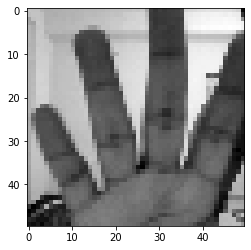

In [32]:
img = r'C:\Users\Sunshine\Downloads\Compressed\samples_of_fingers\Four-samples\67.jpg'
img_array_1 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
img_array_1 = cv2.resize(img_array_1, (50,50))
plt.imshow(img_array_1, cmap = "gray")
plt.show()
img_array_1 = np.array(img_array_1).reshape(-1, img_size, img_size, 1)

In [33]:
y_pred_1 = model.predict(img_array_1)

In [34]:
y_pred_1

array([[7.4365309e-09, 5.0110521e-06, 1.3685997e-05, 9.9998128e-01]],
      dtype=float32)

In [35]:
for i in range(len(y_pred_1)):
    for j in range(4):
        if y_pred_1[i][j] >=0.50:
            y_pred_1[i][j] = 1
        else:
            y_pred_1[i][j] = 0

In [36]:
for i in range(len(y_pred_1)):
    for j in range(4):
        if y_pred_1[i][j] == 1:
            print(j+1)

4


In [43]:
img_1 = r"C:\Users\Sunshine\Downloads\Compressed\samples_of_fingers\Three-samples\134.jpg"

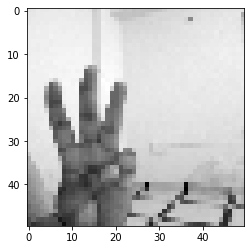

This is 3


In [45]:
img_array_2 = cv2.imread(img_1, cv2.IMREAD_GRAYSCALE)
img_array_2 = cv2.resize(img_array_2, (50,50))
plt.imshow(img_array_2, cmap = "gray")
plt.show()
img_array_2 = np.array(img_array_2).reshape(-1, img_size, img_size, 1)
y_pred_2 = model.predict(img_array_2)
for i in range(len(y_pred_2)):
    for j in range(4):
        if y_pred_2[i][j] >=0.50:
            y_pred_2[i][j] = 1
        else:
            y_pred_2[i][j] = 0
            
for i in range(len(y_pred_2)):
    for j in range(4):
        if y_pred_2[i][j] == 1:
            print("This is",j+1)

In [46]:
import pickle

In [51]:
pickle.dump(model, open("finger_recoginition.pkl", "wb"))

In [53]:
model_1 = pickle.load(open("finger_recoginition.pkl", "rb"))